# ASD detection using SCQ method

In [ ]:
import tensorflow as tf
import numpynumpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pdpddadatasetstaspddadatasetstasetsepdpddadatasetstasetsts.read_csv("dadatasetstasets\ASD_main_Dataset - Sheet1.csv")
pdpddadatasetstasets

FileNotFoundError: [Errno 2] No such file or directory: 'datasets\\ASD_main_Dataset - Sheet1.csv'

# Accuracy of SCQ using counting method

In [ ]:
asd_trait_score = data["Traits_AC_Score"].to_numpy()
asd_real = data["ASD_Traits"].to_numpy()
asd_real.shape

(561,)

# Scoring Conunting Method

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


cm = confusion_matrix(asd_real, asd_trait_score)
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print("TP: ",TP)
print("TN: ", TN)
print("FP: ", FP)
print("FN: ", FN)
print(cm)
accuracy = accuracy_score(asd_real, asd_trait_score)
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)

print("accuracy: ",accuracy, " ", "sensitivity: ", sensitivity, " ", "specificity: ", specificity)

TP:  58
TN:  423
FP:  68
FN:  12
[[423  68]
 [ 12  58]]
accuracy:  0.857397504456328   sensitivity:  0.8285714285714286   specificity:  0.8615071283095723


# Machine learning method

## removing unnecessary column

In [ ]:
data = data.drop(["Name","Score","Traits_AC_Score"], axis=1)
data

,Age,Gender,Relation,Q-1,Q-2,Q-3,Q-4,Q-5,Q-6,Q-7,...,Q-32,Q-33,Q-34,Q-35,Q-36,Q-37,Q-38,Q-39,Q-40,ASD_Traits
0,13,M,OTHER,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
1,10,M,OTHER,0,0,0,0,0,0,0,...,0,1,1,1,0,0,1,1,1,1
2,7,M,PARENT,1,1,1,0,1,1,1,...,1,0,0,1,0,1,1,1,1,1
3,8,M,PARENT,0,0,0,0,0,0,0,...,0,1,1,1,0,0,1,1,1,1
4,8,M,PARENT,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,7,M,OTHER,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
557,6,M,OTHER,1,1,1,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
558,7,F,OTHER,1,1,1,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
559,6,F,OTHER,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


##  create dummy data

In [ ]:
df = pd.get_dummies(data, columns = ["Gender", "Relation"] , drop_first= True)

In [ ]:
df

,Age,Q-1,Q-2,Q-3,Q-4,Q-5,Q-6,Q-7,Q-8,Q-9,...,Q-34,Q-35,Q-36,Q-37,Q-38,Q-39,Q-40,ASD_Traits,Gender_M,Relation_PARENT
0,13,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,1,0
1,10,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,1,1,1,1,0
2,7,1,1,1,0,1,1,1,1,0,...,0,1,0,1,1,1,1,1,1,1
3,8,0,0,0,0,0,0,0,1,1,...,1,1,0,0,1,1,1,1,1,1
4,8,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,7,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
557,6,1,1,1,1,0,0,1,0,1,...,0,1,1,0,0,1,0,0,1,0
558,7,1,1,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
559,6,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Only autism children data

In [ ]:
autism_data= df.head(70)
autism_data

,Age,Q-1,Q-2,Q-3,Q-4,Q-5,Q-6,Q-7,Q-8,Q-9,...,Q-34,Q-35,Q-36,Q-37,Q-38,Q-39,Q-40,ASD_Traits,Gender_M,Relation_PARENT
0,13,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,1,0
1,10,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,1,1,1,1,0
2,7,1,1,1,0,1,1,1,1,0,...,0,1,0,1,1,1,1,1,1,1
3,8,0,0,0,0,0,0,0,1,1,...,1,1,0,0,1,1,1,1,1,1
4,8,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,6,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,1,1,1,1,0
66,13,1,1,1,0,1,1,1,1,1,...,1,1,0,0,0,1,1,1,1,0
67,12,0,0,0,0,0,0,0,1,1,...,1,1,0,1,0,1,1,1,1,1
68,13,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1


### shuffling the dataset

In [ ]:
df = df.sample(frac=1)
df

,Age,Q-1,Q-2,Q-3,Q-4,Q-5,Q-6,Q-7,Q-8,Q-9,...,Q-34,Q-35,Q-36,Q-37,Q-38,Q-39,Q-40,ASD_Traits,Gender_M,Relation_PARENT
544,10,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
402,9,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
380,10,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
528,17,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
460,10,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,6,0,0,0,0,0,0,0,0,1,...,1,0,1,1,0,1,1,1,0,1
208,12,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
459,11,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
520,12,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


# checking null value

In [ ]:
print(data.shape)
print(data.isnull().sum())

(561, 44)
Age           0
Gender        0
Relation      0
Q-1           0
Q-2           0
Q-3           0
Q-4           0
Q-5           0
Q-6           0
Q-7           0
Q-8           0
Q-9           0
Q-10          0
Q-11          0
Q-12          0
Q-13          0
Q-14          0
Q-15          0
Q-16          0
Q-17          0
Q-18          0
Q-19          0
Q-20          0
Q-21          0
Q-22          0
Q-23          0
Q-24          0
Q-25          0
Q-26          0
Q-27          0
Q-28          0
Q-29          0
Q-30          0
Q-31          0
Q-32          0
Q-33          0
Q-34          0
Q-35          0
Q-36          0
Q-37          0
Q-38          0
Q-39          0
Q-40          0
ASD_Traits    0
dtype: int64


### dependent and indepent variable

In [ ]:
x = df.drop(["ASD_Traits"], axis=1)
y = df["ASD_Traits"]
print(x.shape)
print(y.shape)

(561, 43)
(561,)


In [ ]:
#print(x)
#print(y)

# svm model

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC

skfold = StratifiedKFold(n_splits = 10)
svm_model = SVC(kernel="rbf")

accuracy = cross_val_score(svm_model, x, y, cv = skfold)
precision = cross_val_score(svm_model, x, y, cv = skfold, scoring = "precision")
recall = cross_val_score(svm_model, x, y, cv = skfold, scoring = "recall")
f1_score = cross_val_score(svm_model, x, y, cv = skfold, scoring = "f1")

### cross validation scores

In [ ]:
print(accuracy)
print(precision)
print(recall)
print(f1_score)


[0.98245614 0.89285714 0.98214286 0.94642857 0.91071429 0.94642857
 0.92857143 0.92857143 0.92857143 0.94642857]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.85714286 0.14285714 0.85714286 0.57142857 0.28571429 0.57142857
 0.42857143 0.42857143 0.42857143 0.57142857]
[0.92307692 0.25       0.92307692 0.72727273 0.44444444 0.72727273
 0.6        0.6        0.6        0.72727273]


#### avarage of score

In [ ]:
print("Accuracy: ",np.mean(accuracy))
print("Precision: ",np.mean(precision))
print("Recall: ", np.mean(recall))
print("F1_score: ",np.mean(f1_score))

Accuracy:  0.9393170426065163
Precision:  1.0
Recall:  0.5142857142857142
F1_score:  0.6522416472416472


## dataset is imblance

In [ ]:
y.value_counts()


0    491
1     70
Name: ASD_Traits, dtype: int64

Text(0.5, 0, 'ASD_trait')

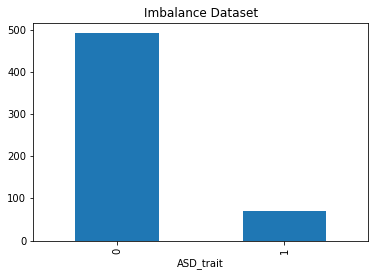

In [ ]:
y.value_counts().plot(kind='bar')
plt.title("Imbalance Dataset")
plt.xlabel("ASD_trait")

## Using SMOTE to balane the dataset

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_resample(x,y)

In [ ]:
y_sm.value_counts()

0    491
1    491
Name: ASD_Traits, dtype: int64

Text(0.5, 0, 'ASD_trait')

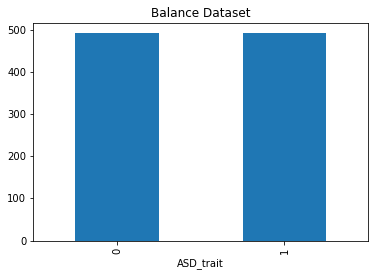

In [ ]:
y_sm.value_counts().plot(kind='bar')
plt.title("Balance Dataset")
plt.xlabel("ASD_trait")

In [ ]:
#print(x_sm)
#print(y_sm)

## After  balancing the dataset

## SVM Model

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

skfold = StratifiedKFold(n_splits = 10, random_state=1, shuffle=True )
svm_model_A = SVC(kernel="rbf")
accuracy = cross_val_score(svm_model_A, x_sm, y_sm, cv = skfold)
precision = cross_val_score(svm_model_A, x_sm, y_sm, cv = skfold, scoring = "precision")
recall = cross_val_score(svm_model_A, x_sm, y_sm, cv = skfold, scoring = "recall")
f1_score = cross_val_score(svm_model_A, x_sm, y_sm, cv = skfold, scoring = "f1")

In [ ]:
print("accuracy: ", np.mean(accuracy))
print("precision: ", np.mean(precision))
print("recall: ", np.mean(recall))
print("F1_score: ", np.mean(f1_score))

accuracy:  0.9500721500721501
precision:  0.9431502038167514
recall:  0.9592244897959186
F1_score:  0.9506491382077054


## KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

skfold = StratifiedKFold(n_splits = 10, random_state=1, shuffle=True )
knn_model= KNeighborsClassifier(n_neighbors=4, p=2, metric="minkowski")

knn_accuracy = cross_val_score(knn_model, x_sm, y_sm, cv = skfold)
knn_precision = cross_val_score(knn_model, x_sm, y_sm, cv = skfold, scoring = "precision")
knn_recall = cross_val_score(knn_model, x_sm, y_sm, cv = skfold, scoring = "recall")
knn_f1_score = cross_val_score(knn_model, x_sm, y_sm, cv = skfold, scoring = "f1")

In [ ]:
print("accuracy: ", np.mean(knn_accuracy))
print("precision: ", np.mean(knn_precision))
print("recall: ", np.mean(knn_recall))
print("F1_score: ", np.mean(knn_f1_score))

accuracy:  0.960307153164296
precision:  0.930996749108321
recall:  0.9959183673469388
F1_score:  0.9619968438575267


## LR Model

In [ ]:
from sklearn.linear_model import LogisticRegression

skfold = StratifiedKFold(n_splits = 10, random_state=1, shuffle=True )
lr_model= LogisticRegression(max_iter=100)

lr_accuracy = cross_val_score(lr_model, x_sm, y_sm, cv = skfold)
lr_precision = cross_val_score(lr_model, x_sm, y_sm, cv = skfold, scoring = "precision")
lr_recall = cross_val_score(lr_model, x_sm, y_sm, cv = skfold, scoring = "recall")
lr_f1_score = cross_val_score(lr_model, x_sm, y_sm, cv = skfold, scoring = "f1")

In [ ]:
print("accuracy: ", np.mean(lr_accuracy))
print("precision: ", np.mean(lr_precision))
print("recall: ", np.mean(lr_recall))
print("F1_score: ", np.mean(lr_f1_score))

accuracy:  0.9521232735518451
precision:  0.9465642616384617
recall:  0.9592244897959186
F1_score:  0.9525641540998684


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

skfold = StratifiedKFold(n_splits = 10, random_state=1, shuffle=True )
dt_model= DecisionTreeClassifier(criterion="entropy", random_state= 3)

dt_accuracy = cross_val_score(dt_model, x_sm, y_sm, cv = skfold)
dt_precision = cross_val_score(dt_model, x_sm, y_sm, cv = skfold, scoring = "precision")
dt_recall = cross_val_score(dt_model, x_sm, y_sm, cv = skfold, scoring = "recall")
dt_f1_score = cross_val_score(dt_model, x_sm, y_sm, cv = skfold, scoring = "f1")

In [ ]:
print("accuracy: ", np.mean(dt_accuracy))
print("precision: ", np.mean(dt_precision))
print("recall: ", np.mean(dt_recall))
print("F1_score: ", np.mean(dt_f1_score))

accuracy:  0.9613275613275611
precision:  0.9393768379146531
recall:  0.9877959183673468
F1_score:  0.9626504444777746


# ANN model

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.30, random_state = 1)

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(25, input_shape=[x.shape[1]],activation = 'relu'),
                             #tf.keras.layers.Dropout(0.2),l

                             tf.keras.layers.Dense(8, activation= "relu"),

                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
               metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]) #,tf.keras.metrics.Precision(), tf.keras.metrics.Recall()

In [ ]:
history = model.fit( x_train, y_train,
                     epochs=200,
                     batch_size = 20,
                     verbose=1,
                     validation_data = (x_test, y_test))

Epoch 1/200
35/35 [==============================] - 2s 22ms/step - loss: 0.6646 - accuracy: 0.5939 - precision_39: 0.5730 - recall_39: 0.7601 - val_loss: 0.6258 - val_accuracy: 0.7492 - val_precision_39: 0.7383 - val_recall_39: 0.7586
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.6972 - precision_39: 0.6547 - recall_39: 0.8439 - val_loss: 0.5748 - val_accuracy: 0.8000 - val_precision_39: 0.7829 - val_recall_39: 0.8207
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7948 - precision_39: 0.8024 - recall_39: 0.7861 - val_loss: 0.5131 - val_accuracy: 0.7932 - val_precision_39: 0.7360 - val_recall_39: 0.9034
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.8137 - precision_39: 0.7795 - recall_39: 0.8786 - val_loss: 0.4287 - val_accuracy: 0.8610 - val_precision_39: 0.8611 - val_recall_39: 0.8552
Epoch 5/200
35/35 [==============================] - 0s 3ms

Epoch 36/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9869 - precision_39: 0.9884 - recall_39: 0.9855 - val_loss: 0.0965 - val_accuracy: 0.9695 - val_precision_39: 0.9595 - val_recall_39: 0.9793
Epoch 37/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9884 - precision_39: 0.9884 - recall_39: 0.9884 - val_loss: 0.0928 - val_accuracy: 0.9729 - val_precision_39: 0.9660 - val_recall_39: 0.9793
Epoch 38/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9913 - precision_39: 0.9913 - recall_39: 0.9913 - val_loss: 0.0923 - val_accuracy: 0.9695 - val_precision_39: 0.9595 - val_recall_39: 0.9793
Epoch 39/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9913 - precision_39: 0.9913 - recall_39: 0.9913 - val_loss: 0.0930 - val_accuracy: 0.9695 - val_precision_39: 0.9595 - val_recall_39: 0.9793
Epoch 40/200
35/35 [==============================] - 0s

Epoch 71/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 1.0000 - precision_39: 1.0000 - recall_39: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9898 - val_precision_39: 0.9863 - val_recall_39: 0.9931
Epoch 72/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 0.9985 - precision_39: 0.9971 - recall_39: 1.0000 - val_loss: 0.0698 - val_accuracy: 0.9898 - val_precision_39: 0.9863 - val_recall_39: 0.9931
Epoch 73/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9985 - precision_39: 0.9971 - recall_39: 1.0000 - val_loss: 0.0750 - val_accuracy: 0.9864 - val_precision_39: 0.9796 - val_recall_39: 0.9931
Epoch 74/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000 - precision_39: 1.0000 - recall_39: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9864 - val_precision_39: 0.9796 - val_recall_39: 0.9931
Epoch 75/200
35/35 [==============================] - 0s

Epoch 106/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000 - precision_39: 1.0000 - recall_39: 1.0000 - val_loss: 0.0782 - val_accuracy: 0.9864 - val_precision_39: 0.9796 - val_recall_39: 0.9931
Epoch 107/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000 - precision_39: 1.0000 - recall_39: 1.0000 - val_loss: 0.0775 - val_accuracy: 0.9864 - val_precision_39: 0.9796 - val_recall_39: 0.9931
Epoch 108/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000 - precision_39: 1.0000 - recall_39: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9864 - val_precision_39: 0.9796 - val_recall_39: 0.9931
Epoch 109/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000 - precision_39: 1.0000 - recall_39: 1.0000 - val_loss: 0.0784 - val_accuracy: 0.9864 - val_precision_39: 0.9796 - val_recall_39: 0.9931
Epoch 110/200
35/35 [==============================]

35/35 [==============================] - 0s 5ms/step - loss: 3.3405e-04 - accuracy: 1.0000 - precision_39: 1.0000 - recall_39: 1.0000 - val_loss: 0.0891 - val_accuracy: 0.9831 - val_precision_39: 0.9730 - val_recall_39: 0.9931
Epoch 175/200
35/35 [==============================] - 0s 6ms/step - loss: 3.2481e-04 - accuracy: 1.0000 - precision_39: 1.0000 - recall_39: 1.0000 - val_loss: 0.0903 - val_accuracy: 0.9831 - val_precision_39: 0.9730 - val_recall_39: 0.9931
Epoch 176/200
35/35 [==============================] - 0s 5ms/step - loss: 3.1011e-04 - accuracy: 1.0000 - precision_39: 1.0000 - recall_39: 1.0000 - val_loss: 0.0889 - val_accuracy: 0.9831 - val_precision_39: 0.9730 - val_recall_39: 0.9931
Epoch 177/200
35/35 [==============================] - 0s 6ms/step - loss: 3.0698e-04 - accuracy: 1.0000 - precision_39: 1.0000 - recall_39: 1.0000 - val_loss: 0.0905 - val_accuracy: 0.9831 - val_precision_39: 0.9730 - val_recall_39: 0.9931
Epoch 178/200
35/35 [=============================

### f1score

In [ ]:
f1_score_ann = 2*0.973*0.9931/(0.973+0.9931)
print("F1_score: ", f1_score_ann)

F1_score:  0.9829472559890138


## plot

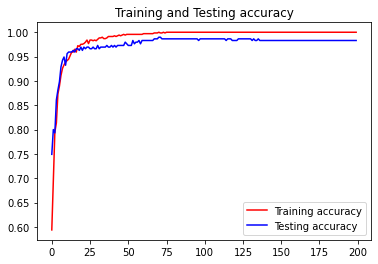

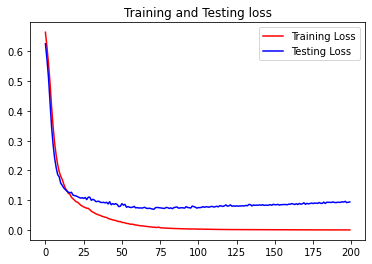

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
#data type of variable
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', color='r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', color='r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Testing Loss')
plt.title('Training and Testing loss')
plt.legend()

plt.show()

In [ ]:
#def round_output(a):
#    for i in range(len(a)):
#        if(a[i]>=.5):
#            a[i]=1
#        else:
#            a[i]=0
#    return a

In [ ]:
#p=model.predict(x_test)
#p = round_output(p)
#print(p)
#len(y_test)
#accuracy = accuracy_score(y_test, p)
#accuracy

### ANN model k-fold cross validation

In [ ]:
X = x_sm.values
Y = y_sm.values

In [ ]:
def round_output(a):
    for i in range(len(a)):
        if(a[i]>=.5):
            a[i]=1
        else:
            a[i]=0
    return a

In [ ]:
def precision_recall_f1(cm):
    print(cm)
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    print("TP: ",TP)
    print("TN: ", TN)
    print("FP: ", FP)
    print("FN: ", FN)

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1 = 2*precision*recall/(precision+recall)
    return precision, recall, f1

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Accuracy = []
Precision = []
Recall = []
F1 = []
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state=1)



for train, test in skfold.split(X, Y):
    X_train = X[train]
    Y_train = Y[train]
    X_test = X[test]
    Y_test = Y[test]

    model_k = tf.keras.Sequential([tf.keras.layers.Dense(25, input_shape=[x.shape[1]],activation = 'relu'),
                                 #tf.keras.layers.Dropout(0.2),
                                 #tf.keras.layers.Dense(10, activation= "relu"),

                                 tf.keras.layers.Dense(8, activation= "relu"),

                                 tf.keras.layers.Dense(1, activation='sigmoid')])

    model_k.compile(loss='binary_crossentropy',
                  optimizer='adam',
                   metrics=['accuracy'])

    model_k.fit( X_train, Y_train,
                     epochs=200,
                     batch_size = 20,
                     verbose=1,
                     validation_data = (X_test, Y_test))

    #round prediction
    pre= model_k.predict(X_test)
    prediction = round_output(pre)

    cm = confusion_matrix(Y_test, prediction)

    #Model scores
    accuracy = accuracy_score(Y_test, prediction)
    precision, recall, f1 = precision_recall_f1(cm)
    print("accuracy: ",accuracy, " ", "precision: ", precision, " ", "recall: ", recall, " ", "F1: ", f1)
    #print(Y_test)

    #append to list
    Accuracy.append(accuracy)
    Precision.append(precision)
    Recall.append(recall)
    F1.append(f1)
    print("\n\n")

#print(x_train.shape,"  ", y_train.shape)
#print(x_test.shape, "  ", y_test.shape)

Epoch 1/200
45/45 [==============================] - 1s 7ms/step - loss: 0.7927 - accuracy: 0.5119 - val_loss: 0.6596 - val_accuracy: 0.6465
Epoch 2/200
45/45 [==============================] - 0s 4ms/step - loss: 0.6148 - accuracy: 0.7123 - val_loss: 0.5548 - val_accuracy: 0.7374
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.8097 - val_loss: 0.4459 - val_accuracy: 0.8586
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 0.4030 - accuracy: 0.8641 - val_loss: 0.3747 - val_accuracy: 0.8687
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8811 - val_loss: 0.3237 - val_accuracy: 0.9091
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2795 - accuracy: 0.8969 - val_loss: 0.2828 - val_accuracy: 0.9091
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.9094 - val_loss: 0.2565 - val_accuracy: 0.8889
Epoch 8/200
4

Epoch 116/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0565 - val_accuracy: 0.9697
Epoch 117/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9697
Epoch 118/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9697
Epoch 119/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9697
Epoch 120/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0590 - val_accuracy: 0.9697
Epoch 121/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9697
Epoch 122/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0606 - val_accuracy: 0.9697

45/45 [==============================] - 0s 3ms/step - loss: 2.6954e-04 - accuracy: 1.0000 - val_loss: 0.0671 - val_accuracy: 0.9697
Epoch 173/200
45/45 [==============================] - 0s 2ms/step - loss: 2.4918e-04 - accuracy: 1.0000 - val_loss: 0.0662 - val_accuracy: 0.9697
Epoch 174/200
45/45 [==============================] - 0s 2ms/step - loss: 2.4425e-04 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9697
Epoch 175/200
45/45 [==============================] - 0s 2ms/step - loss: 2.3824e-04 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9798
Epoch 176/200
45/45 [==============================] - 0s 2ms/step - loss: 2.2308e-04 - accuracy: 1.0000 - val_loss: 0.0716 - val_accuracy: 0.9697
Epoch 177/200
45/45 [==============================] - 0s 2ms/step - loss: 2.1895e-04 - accuracy: 1.0000 - val_loss: 0.0663 - val_accuracy: 0.9798
Epoch 178/200
45/45 [==============================] - 0s 2ms/step - loss: 2.6719e-04 - accuracy: 1.0000 - val_loss: 0.0614 - val_ac

Epoch 85/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1187 - val_accuracy: 0.9697
Epoch 86/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1204 - val_accuracy: 0.9697
Epoch 87/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1191 - val_accuracy: 0.9697
Epoch 88/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1212 - val_accuracy: 0.9697
Epoch 89/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1219 - val_accuracy: 0.9697
Epoch 90/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.9697
Epoch 91/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1231 - val_accuracy: 0.9697
Epoch 

Epoch 197/200
45/45 [==============================] - 0s 3ms/step - loss: 4.6419e-05 - accuracy: 1.0000 - val_loss: 0.1857 - val_accuracy: 0.9697
Epoch 198/200
45/45 [==============================] - 0s 2ms/step - loss: 4.6864e-05 - accuracy: 1.0000 - val_loss: 0.1868 - val_accuracy: 0.9697
Epoch 199/200
45/45 [==============================] - 0s 3ms/step - loss: 4.4326e-05 - accuracy: 1.0000 - val_loss: 0.1883 - val_accuracy: 0.9697
Epoch 200/200
45/45 [==============================] - 0s 3ms/step - loss: 4.2922e-05 - accuracy: 1.0000 - val_loss: 0.1878 - val_accuracy: 0.9697
[[48  1]
 [ 2 48]]
TP:  48
TN:  48
FP:  1
FN:  2
accuracy:  0.9696969696969697   precision:  0.9795918367346939   recall:  0.96   F1:  0.9696969696969697



Epoch 1/200
45/45 [==============================] - 1s 6ms/step - loss: 0.6665 - accuracy: 0.6018 - val_loss: 0.5949 - val_accuracy: 0.7449
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 0.5216 - accuracy: 0.7455 - val_loss: 0.4

Epoch 110/200
45/45 [==============================] - 0s 2ms/step - loss: 2.9354e-04 - accuracy: 1.0000 - val_loss: 0.1822 - val_accuracy: 0.9592
Epoch 111/200
45/45 [==============================] - 0s 2ms/step - loss: 2.8002e-04 - accuracy: 1.0000 - val_loss: 0.1798 - val_accuracy: 0.9592
Epoch 112/200
45/45 [==============================] - 0s 2ms/step - loss: 2.7124e-04 - accuracy: 1.0000 - val_loss: 0.1778 - val_accuracy: 0.9592
Epoch 113/200
45/45 [==============================] - 0s 2ms/step - loss: 2.5929e-04 - accuracy: 1.0000 - val_loss: 0.1809 - val_accuracy: 0.9592
Epoch 114/200
45/45 [==============================] - 0s 2ms/step - loss: 2.5392e-04 - accuracy: 1.0000 - val_loss: 0.1856 - val_accuracy: 0.9592
Epoch 115/200
45/45 [==============================] - 0s 2ms/step - loss: 2.4265e-04 - accuracy: 1.0000 - val_loss: 0.1795 - val_accuracy: 0.9592
Epoch 116/200
45/45 [==============================] - 0s 2ms/step - loss: 2.3043e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 166/200
45/45 [==============================] - 0s 3ms/step - loss: 4.4322e-05 - accuracy: 1.0000 - val_loss: 0.2031 - val_accuracy: 0.9592
Epoch 167/200
45/45 [==============================] - 0s 2ms/step - loss: 4.1668e-05 - accuracy: 1.0000 - val_loss: 0.2101 - val_accuracy: 0.9592
Epoch 168/200
45/45 [==============================] - 0s 3ms/step - loss: 4.0196e-05 - accuracy: 1.0000 - val_loss: 0.2118 - val_accuracy: 0.9592
Epoch 169/200
45/45 [==============================] - 0s 2ms/step - loss: 3.9856e-05 - accuracy: 1.0000 - val_loss: 0.2057 - val_accuracy: 0.9592
Epoch 170/200
45/45 [==============================] - 0s 3ms/step - loss: 3.7676e-05 - accuracy: 1.0000 - val_loss: 0.2181 - val_accuracy: 0.9592
Epoch 171/200
45/45 [==============================] - 0s 2ms/step - loss: 3.7082e-05 - accuracy: 1.0000 - val_loss: 0.2135 - val_accuracy: 0.9592
Epoch 172/200
45/45 [==============================] - 0s 2ms/step - loss: 3.5595e-05 - accuracy: 1.0000 - val_loss: 0

Epoch 79/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2305 - val_accuracy: 0.9592
Epoch 80/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2367 - val_accuracy: 0.9490
Epoch 81/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2328 - val_accuracy: 0.9490
Epoch 82/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2344 - val_accuracy: 0.9490
Epoch 83/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2462 - val_accuracy: 0.9490
Epoch 84/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2414 - val_accuracy: 0.9490
Epoch 85/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2504 - val_accuracy: 0.9490
Epoch 

Epoch 191/200
45/45 [==============================] - 0s 3ms/step - loss: 5.9389e-05 - accuracy: 1.0000 - val_loss: 0.3685 - val_accuracy: 0.9490
Epoch 192/200
45/45 [==============================] - 0s 2ms/step - loss: 5.9789e-05 - accuracy: 1.0000 - val_loss: 0.3729 - val_accuracy: 0.9490
Epoch 193/200
45/45 [==============================] - 0s 2ms/step - loss: 5.6633e-05 - accuracy: 1.0000 - val_loss: 0.3669 - val_accuracy: 0.9490
Epoch 194/200
45/45 [==============================] - 0s 2ms/step - loss: 5.4652e-05 - accuracy: 1.0000 - val_loss: 0.3691 - val_accuracy: 0.9490
Epoch 195/200
45/45 [==============================] - 0s 2ms/step - loss: 5.2875e-05 - accuracy: 1.0000 - val_loss: 0.3701 - val_accuracy: 0.9490
Epoch 196/200
45/45 [==============================] - 0s 2ms/step - loss: 5.1392e-05 - accuracy: 1.0000 - val_loss: 0.3717 - val_accuracy: 0.9490
Epoch 197/200
45/45 [==============================] - 0s 3ms/step - loss: 5.0119e-05 - accuracy: 1.0000 - val_loss: 0

Epoch 105/200
45/45 [==============================] - 0s 3ms/step - loss: 8.7518e-04 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 0.9898
Epoch 106/200
45/45 [==============================] - 0s 3ms/step - loss: 8.5785e-04 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9898
Epoch 107/200
45/45 [==============================] - 0s 3ms/step - loss: 8.5193e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9898
Epoch 108/200
45/45 [==============================] - 0s 3ms/step - loss: 8.1662e-04 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 0.9898
Epoch 109/200
45/45 [==============================] - 0s 3ms/step - loss: 7.7193e-04 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9898
Epoch 110/200
45/45 [==============================] - 0s 3ms/step - loss: 7.7375e-04 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 0.9898
Epoch 111/200
45/45 [==============================] - 0s 3ms/step - loss: 7.3795e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 161/200
45/45 [==============================] - 0s 2ms/step - loss: 1.3279e-04 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 0.9898
Epoch 162/200
45/45 [==============================] - 0s 3ms/step - loss: 1.2992e-04 - accuracy: 1.0000 - val_loss: 0.0167 - val_accuracy: 0.9898
Epoch 163/200
45/45 [==============================] - 0s 3ms/step - loss: 1.3378e-04 - accuracy: 1.0000 - val_loss: 0.0155 - val_accuracy: 0.9898
Epoch 164/200
45/45 [==============================] - 0s 3ms/step - loss: 1.2156e-04 - accuracy: 1.0000 - val_loss: 0.0143 - val_accuracy: 0.9898
Epoch 165/200
45/45 [==============================] - 0s 3ms/step - loss: 1.1494e-04 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9898
Epoch 166/200
45/45 [==============================] - 0s 3ms/step - loss: 1.1420e-04 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 0.9898
Epoch 167/200
45/45 [==============================] - 0s 3ms/step - loss: 1.1432e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 16/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9762 - val_loss: 0.0816 - val_accuracy: 0.9796
Epoch 17/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.9796 - val_loss: 0.0883 - val_accuracy: 0.9796
Epoch 18/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0750 - accuracy: 0.9830 - val_loss: 0.0709 - val_accuracy: 0.9796
Epoch 19/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9819 - val_loss: 0.0741 - val_accuracy: 0.9796
Epoch 20/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9842 - val_loss: 0.0635 - val_accuracy: 0.9898
Epoch 21/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0601 - accuracy: 0.9876 - val_loss: 0.0738 - val_accuracy: 0.9796
Epoch 22/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9887 - val_loss: 0.0592 - val_accuracy: 0.9898
Epoch 

Epoch 74/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 0.9898
Epoch 75/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 76/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9898
Epoch 77/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0383 - val_accuracy: 0.9898
Epoch 78/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0482 - val_accuracy: 0.9796
Epoch 79/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0412 - val_accuracy: 0.9898
Epoch 80/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 0.9796
Epoch 

Epoch 186/200
45/45 [==============================] - 0s 3ms/step - loss: 5.6068e-05 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9898
Epoch 187/200
45/45 [==============================] - 0s 3ms/step - loss: 5.4434e-05 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 0.9898
Epoch 188/200
45/45 [==============================] - 0s 3ms/step - loss: 5.4132e-05 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9898
Epoch 189/200
45/45 [==============================] - 0s 2ms/step - loss: 5.2518e-05 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9898
Epoch 190/200
45/45 [==============================] - 0s 3ms/step - loss: 5.1404e-05 - accuracy: 1.0000 - val_loss: 0.0502 - val_accuracy: 0.9898
Epoch 191/200
45/45 [==============================] - 0s 3ms/step - loss: 4.9352e-05 - accuracy: 1.0000 - val_loss: 0.0485 - val_accuracy: 0.9898
Epoch 192/200
45/45 [==============================] - 0s 2ms/step - loss: 4.7520e-05 - accuracy: 1.0000 - val_loss: 0

Epoch 100/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1252 - val_accuracy: 0.9898
Epoch 101/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1244 - val_accuracy: 0.9898
Epoch 102/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 0.9898
Epoch 103/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1276 - val_accuracy: 0.9898
Epoch 104/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1283 - val_accuracy: 0.9898
Epoch 105/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1269 - val_accuracy: 0.9898
Epoch 106/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1294 - val_accuracy: 0.9898

Epoch 11/200
45/45 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9491 - val_loss: 0.1410 - val_accuracy: 0.9286
Epoch 12/200
45/45 [==============================] - 0s 2ms/step - loss: 0.1306 - accuracy: 0.9570 - val_loss: 0.1752 - val_accuracy: 0.9082
Epoch 13/200
45/45 [==============================] - 0s 2ms/step - loss: 0.1278 - accuracy: 0.9491 - val_loss: 0.1223 - val_accuracy: 0.9388
Epoch 14/200
45/45 [==============================] - 0s 2ms/step - loss: 0.1122 - accuracy: 0.9695 - val_loss: 0.1128 - val_accuracy: 0.9592
Epoch 15/200
45/45 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9695 - val_loss: 0.1076 - val_accuracy: 0.9694
Epoch 16/200
45/45 [==============================] - 0s 3ms/step - loss: 0.1002 - accuracy: 0.9695 - val_loss: 0.0937 - val_accuracy: 0.9796
Epoch 17/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.9706 - val_loss: 0.0815 - val_accuracy: 0.9694
Epoch 

Epoch 69/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0337 - val_accuracy: 0.9796
Epoch 70/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 71/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9898
Epoch 72/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9898
Epoch 73/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 74/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 75/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0271 - val_accuracy: 0.9898
Epoch 

45/45 [==============================] - 0s 3ms/step - loss: 4.9949e-04 - accuracy: 1.0000 - val_loss: 0.0193 - val_accuracy: 0.9898
Epoch 127/200
45/45 [==============================] - 0s 2ms/step - loss: 4.6369e-04 - accuracy: 1.0000 - val_loss: 0.0197 - val_accuracy: 0.9898
Epoch 128/200
45/45 [==============================] - 0s 2ms/step - loss: 4.5953e-04 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 0.9898
Epoch 129/200
45/45 [==============================] - 0s 2ms/step - loss: 4.5350e-04 - accuracy: 1.0000 - val_loss: 0.0207 - val_accuracy: 0.9898
Epoch 130/200
45/45 [==============================] - 0s 3ms/step - loss: 4.1975e-04 - accuracy: 1.0000 - val_loss: 0.0188 - val_accuracy: 0.9898
Epoch 131/200
45/45 [==============================] - 0s 2ms/step - loss: 4.0044e-04 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0.9898
Epoch 132/200
45/45 [==============================] - 0s 2ms/step - loss: 4.0265e-04 - accuracy: 1.0000 - val_loss: 0.0203 - val_ac

Epoch 182/200
45/45 [==============================] - 0s 2ms/step - loss: 8.2845e-05 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 0.9898
Epoch 183/200
45/45 [==============================] - 0s 2ms/step - loss: 7.7851e-05 - accuracy: 1.0000 - val_loss: 0.0232 - val_accuracy: 0.9898
Epoch 184/200
45/45 [==============================] - 0s 2ms/step - loss: 7.5620e-05 - accuracy: 1.0000 - val_loss: 0.0225 - val_accuracy: 0.9898
Epoch 185/200
45/45 [==============================] - 0s 2ms/step - loss: 7.2963e-05 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 0.9898
Epoch 186/200
45/45 [==============================] - 0s 2ms/step - loss: 7.1237e-05 - accuracy: 1.0000 - val_loss: 0.0245 - val_accuracy: 0.9898
Epoch 187/200
45/45 [==============================] - 0s 2ms/step - loss: 6.8564e-05 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9898
Epoch 188/200
45/45 [==============================] - 0s 2ms/step - loss: 6.7044e-05 - accuracy: 1.0000 - val_loss: 0

Epoch 96/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9977 - val_loss: 0.2487 - val_accuracy: 0.9592
Epoch 97/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9977 - val_loss: 0.2410 - val_accuracy: 0.9592
Epoch 98/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9977 - val_loss: 0.2480 - val_accuracy: 0.9592
Epoch 99/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9977 - val_loss: 0.2349 - val_accuracy: 0.9592
Epoch 100/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9977 - val_loss: 0.2048 - val_accuracy: 0.9592
Epoch 101/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9977 - val_loss: 0.2177 - val_accuracy: 0.9592
Epoch 102/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9977 - val_loss: 0.2099 - val_accuracy: 0.9592
Epo

45/45 [==============================] - 0s 3ms/step - loss: 0.1667 - accuracy: 0.9412 - val_loss: 0.2597 - val_accuracy: 0.8673
Epoch 10/200
45/45 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9434 - val_loss: 0.2491 - val_accuracy: 0.8673
Epoch 11/200
45/45 [==============================] - 0s 3ms/step - loss: 0.1392 - accuracy: 0.9536 - val_loss: 0.2350 - val_accuracy: 0.8878
Epoch 12/200
45/45 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9559 - val_loss: 0.2253 - val_accuracy: 0.9082
Epoch 13/200
45/45 [==============================] - 0s 3ms/step - loss: 0.1179 - accuracy: 0.9604 - val_loss: 0.2150 - val_accuracy: 0.9082
Epoch 14/200
45/45 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.9638 - val_loss: 0.2150 - val_accuracy: 0.9082
Epoch 15/200
45/45 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 0.9627 - val_loss: 0.1964 - val_accuracy: 0.9184
Epoch 16/200
45/45 

Epoch 67/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.1679 - val_accuracy: 0.9592
Epoch 68/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1603 - val_accuracy: 0.9592
Epoch 69/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1597 - val_accuracy: 0.9592
Epoch 70/200
45/45 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1614 - val_accuracy: 0.9592
Epoch 71/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1614 - val_accuracy: 0.9592
Epoch 72/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1591 - val_accuracy: 0.9592
Epoch 73/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1634 - val_accuracy: 0.9592
Epoch 

Epoch 179/200
45/45 [==============================] - 0s 4ms/step - loss: 4.2955e-05 - accuracy: 1.0000 - val_loss: 0.2338 - val_accuracy: 0.9592
Epoch 180/200
45/45 [==============================] - 0s 3ms/step - loss: 4.1218e-05 - accuracy: 1.0000 - val_loss: 0.2337 - val_accuracy: 0.9592
Epoch 181/200
45/45 [==============================] - 0s 3ms/step - loss: 4.0214e-05 - accuracy: 1.0000 - val_loss: 0.2356 - val_accuracy: 0.9592
Epoch 182/200
45/45 [==============================] - 0s 3ms/step - loss: 3.9759e-05 - accuracy: 1.0000 - val_loss: 0.2347 - val_accuracy: 0.9592
Epoch 183/200
45/45 [==============================] - 0s 3ms/step - loss: 3.7959e-05 - accuracy: 1.0000 - val_loss: 0.2359 - val_accuracy: 0.9592
Epoch 184/200
45/45 [==============================] - 0s 3ms/step - loss: 3.6960e-05 - accuracy: 1.0000 - val_loss: 0.2367 - val_accuracy: 0.9592
Epoch 185/200
45/45 [==============================] - 0s 3ms/step - loss: 3.5847e-05 - accuracy: 1.0000 - val_loss: 0

## after using k-fold cross val

In [ ]:
print("Accuracy: ", np.mean(Accuracy))
print("Precision: ", np.mean(Precision))
print("Recall: ", np.mean(Recall))
print("F1_score: ", np.mean(F1))

Accuracy:  0.9735209235209237
Precision:  0.9645790008311017
Recall:  0.9837551020408162
F1_score:  0.9739171547283068


### Model Prediction

In [ ]:
autism_data.head(2)

,Age,Q-1,Q-2,Q-3,Q-4,Q-5,Q-6,Q-7,Q-8,Q-9,...,Q-34,Q-35,Q-36,Q-37,Q-38,Q-39,Q-40,ASD_Traits,Gender_M,Relation_PARENT
0,13,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,1,0
1,10,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,1,1,1,1,0


In [ ]:
x_autism = autism_data.drop(["ASD_Traits"], axis=1).to_numpy()
x_autism.shape

(70, 43)

In [ ]:
pre = model.predict(x_autism)
ASD_ANN = round_output(pre).flatten().astype(int)
print(ASD_ANN)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
dt = pd.read_csv("datasets\ASD_main_Dataset - Sheet1.csv")
dt.head(5)

,Name,Age,Gender,Relation,Q-1,Q-2,Q-3,Q-4,Q-5,Q-6,...,Q-34,Q-35,Q-36,Q-37,Q-38,Q-39,Q-40,Score,Traits_AC_Score,ASD_Traits
0,Nafsi rahman,13,M,OTHER,1,1,0,0,0,0,...,0,0,1,0,0,1,0,14,0,1
1,Riyabn Mahmud,10,M,OTHER,0,0,0,0,0,0,...,1,1,0,0,1,1,1,19,1,1
2,Shartok Bartaacharjo,7,M,PARENT,1,1,1,0,1,1,...,0,1,0,1,1,1,1,25,1,1
3,Md Hamid,8,M,PARENT,0,0,0,0,0,0,...,1,1,0,0,1,1,1,15,1,1
4,Rajesh kanti das,8,M,PARENT,0,0,0,0,0,0,...,1,1,1,1,1,1,1,24,1,1


In [ ]:
ASD_score = dt["Traits_AC_Score"].head(70).to_numpy()
ASD_Actual = dt["ASD_Traits"].head(70).to_numpy()
#print(ASD_score)
#print(ASD_Actual)

In [ ]:
com = {"ASD_score": ASD_score,
       "ASD_ANN": ASD_ANN,
       "ASD_Actual": ASD_Actual}

In [ ]:
pd.set_option('display.max_rows', None)
comparison = pd.DataFrame(com)
comparison

,ASD_score,ASD_ANN,ASD_Actual
0,0,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1
6,0,1,1
7,1,1,1
8,1,1,1
9,1,1,1


### layers weights and bias

In [ ]:
#model.layers[0].get_weights()

In [ ]:
#model.layers[1].get_weights()

In [ ]:
#model.layers[2].get_weights()